# Project - Dr. Consultation fee

In [42]:
#lets import pandas library to read the CSV data
import pandas as pd
df = pd.read_excel('Final_Train.xlsx')
df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ₹250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250
...,...,...,...,...,...,...,...
5956,"MBBS, MS - ENT",19 years experience,98%,"Basavanagudi, Bangalore",ENT Specialist,"98% 45 Feedback Basavanagudi, Bangalore",300
5957,MBBS,33 years experience,NaN,"Nungambakkam, Chennai",General Medicine,NaN,100
5958,MBBS,41 years experience,97%,"Greater Kailash Part 2, Delhi",General Medicine,"97% 11 Feedback Greater Kailash Part 2, Delhi",600
5959,"MBBS, MD - General Medicine",15 years experience,90%,"Vileparle West, Mumbai",General Medicine,General Medical Consultation Viral Fever Treat...,100


In [43]:
#Check the columns name
df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'],
      dtype='object')

In [44]:
#Lets check the null value is present in any of the column
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

Null values are present in column. So we have to fill it.

In [45]:
df["Rating"].replace("NEW",0,inplace=True)
df["Rating"].replace("-",0,inplace=True)
df["Rating"].fillna(0,inplace=True)

Miscellaneous info and Place is of no use as it will not affect our data. So we have to drop it.

In [46]:
df.drop(columns=['Miscellaneous_Info'],inplace=True)
df.drop(columns=['Place'],inplace=True)
df.drop(columns=['Rating'],inplace=True)

In [52]:
df["Experience"]=df["Experience"].astype(int)

In [49]:
df.head()

,Qualification,Experience,Profile,Fees
0,"BHMS, MD - Homeopathy",24 years experience,Homeopath,100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,Ayurveda,350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,ENT Specialist,300
3,"BSc - Zoology, BAMS",12 years experience,Ayurveda,250
4,BAMS,20 years experience,Ayurveda,250


In [50]:
df.isnull().sum()

Qualification    0
Experience       0
Profile          0
Fees             0
dtype: int64

Now there are no null values.

In [51]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
le=LabelEncoder()
for columns in df.columns:
    if df[columns].dtype==np.number:
        continue
    df[columns]=le.fit_transform(df[columns])

In [53]:
#get the summary
df.describe()

,Qualification,Experience,Profile,Fees
count,5961.000000,5961.000000,5961.000000,5961.000000
mean,596.857574,23.010904,2.441872,18.930381
std,413.842446,20.937163,1.658014,8.185456
min,0.000000,0.000000,0.000000,0.000000
25%,219.000000,6.000000,1.000000,12.000000
50%,596.000000,15.000000,2.000000,21.000000
75%,943.000000,36.000000,4.000000,28.000000
max,1419.000000,63.000000,5.000000,39.000000


# EDA

# Univariate

In [54]:
#lets check the count of each column
df['Qualification'].value_counts()

134     488
351     477
10      471
596     334
1075    220
       ... 
702       1
706       1
710       1
714       1
0         1
Name: Qualification, Length: 1420, dtype: int64

In [55]:
#lets check the count of each column
df['Experience'].value_counts()

63    323
1     294
2     288
62    282
3     279
     ... 
59      1
54      1
58      1
53      1
57      1
Name: Experience, Length: 64, dtype: int64

In [56]:
#lets check the count of each column
df['Profile'].value_counts()

1    1397
4    1173
2    1034
5     843
0     786
3     728
Name: Profile, dtype: int64

In [57]:
#lets check the count of each column
df['Fees'].value_counts()

9     1306
28     938
14     904
21     864
24     424
17     307
12     253
30     215
33     153
35     143
22     143
5       81
26      65
34      34
29      22
32      21
7       18
37      18
8       12
6       11
3        4
13       2
18       2
11       2
23       2
4        2
1        2
36       1
20       1
16       1
39       1
25       1
2        1
10       1
38       1
15       1
19       1
27       1
31       1
0        1
Name: Fees, dtype: int64

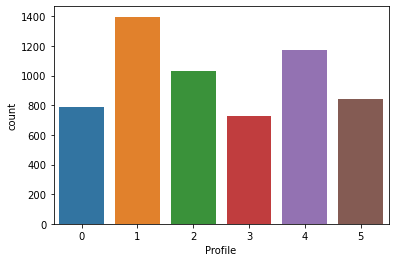

In [58]:
#lets see the columns graphically to understand more clearly using some visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Profile',data=df)
plt.show()

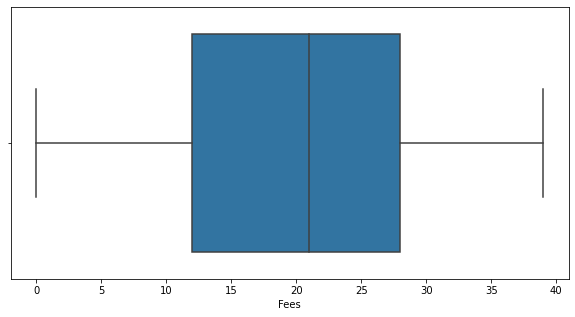

In [59]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='Fees',data=df)
plt.show()

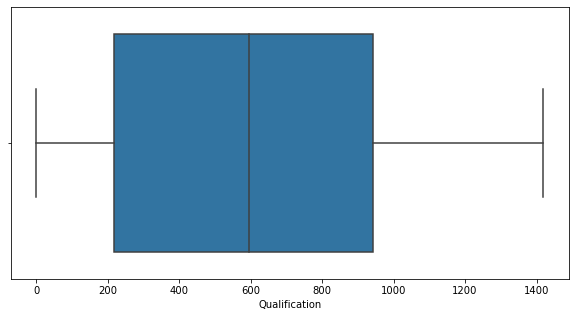

In [60]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='Qualification',data=df)
plt.show()

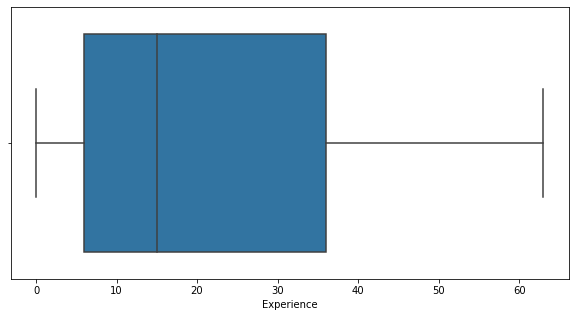

In [61]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='Experience',data=df)
plt.show()

# Bivariate

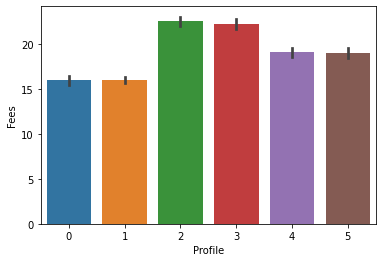

In [62]:
#Lets check Fess vs other varibles
sns.barplot(x='Profile',y='Fees',data=df)
plt.show()

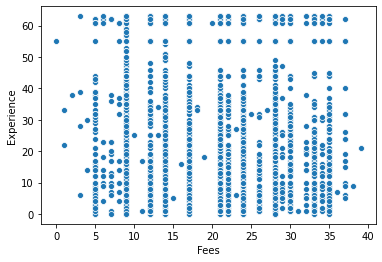

In [63]:
sns.scatterplot(x='Fees',y='Experience',data=df)
plt.show()

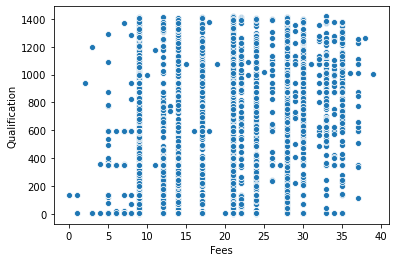

In [64]:
sns.scatterplot(x='Fees',y='Qualification',data=df)
plt.show()

# Correlation between columns

In [65]:
df.corr()

,Qualification,Experience,Profile,Fees
Qualification,1.000000,0.003325,0.393123,0.259488
Experience,0.003325,1.000000,-0.032711,-0.046922
Profile,0.393123,-0.032711,1.000000,0.144355
Fees,0.259488,-0.046922,0.144355,1.000000


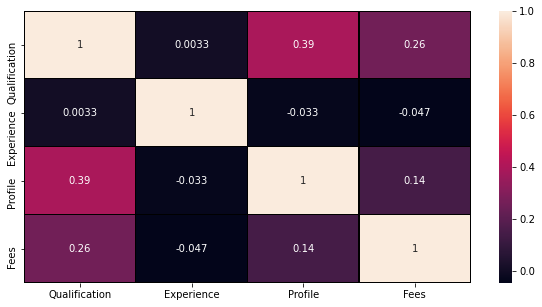

In [66]:
#lets check the correlation using heatmap for better understanding
plt.subplots(figsize=(10,5))
sns.heatmap(df.corr(),linewidths=.1,linecolor='black', annot=True)

From above we can say that some columns have positive correlation with others.

# Checking Outliers

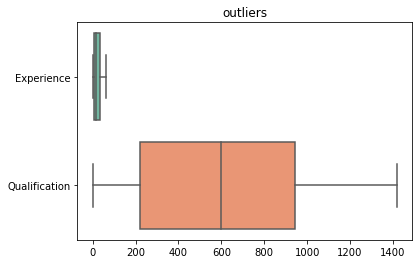

In [67]:
sns.boxplot(data=df[['Experience','Qualification']],orient='h',palette='Set2')
plt.title('outliers')
plt.show()

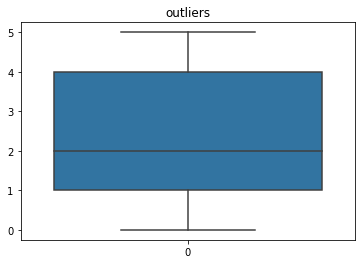

In [68]:
sns.boxplot(data=df['Profile'])
plt.title('outliers')
plt.show()

there are no outliers.

In [69]:
#lets check the skewness of all columns
df.skew()

Qualification    0.239720
Experience       0.823531
Profile          0.108803
Fees             0.185038
dtype: float64

In [70]:
#lets split the data into x and y variable(input & output)
x=df.drop(columns=["Fees"])
y=df[["Fees"]] #this is our target variable

In [71]:
#Scaling is used to bring the dataset in common range
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scaledx=sc.fit_transform(x)

In [72]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

C:\Users\Anirudha\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([ 9, 22, 21, ..., 30,  9, 14], dtype=int64)

In [73]:
#finding best random state
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

best_rstate=0
accu=0
for i in range(1,1000):
    x_train,x_test,y_train,y_test=train_test_split(scaledx,y,test_size=.2,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f'Best accuracy {accu*100} on random_state {best_rstate}')       

Best accuracy 11.277743780557692 on random_state 728


In [74]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()
adb.fit(x_train,y_train)
y_pred=adb.predict(x_test)
r2s=r2_score(y_test,y_pred)
cvs=cross_val_score(AdaBoostRegressor(),x_train,y_train,cv=5).mean()
print('Accuracy=',r2s*100,'cvs=',cvs*100)

Accuracy= 11.420887307980188 cvs= 11.744488073722827


# Model Saving

In [75]:
import pickle
filename='drfee.pkl'
pickle.dump(adb,open(filename,'wb'))

# Using the Test dataset

In [76]:
#Loading the test data
test_df=pd.read_excel('Final_Test.xlsx')
test_df

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...
...,...,...,...,...,...,...
1982,"BAMS, Doctor of Medicine",10 years experience,NaN,"Basavanagudi, Bangalore",Ayurveda,NaN
1983,"MD - Dermatology , Venereology & Leprosy, MBBS",4 years experience,NaN,"Choolai, Chennai",Dermatologists,NaN
1984,"MBBS, MD / MS - Obstetrics & Gynaecology",9 years experience,NaN,"Porur, Chennai",General Medicine,NaN
1985,BDS,12 years experience,98%,"Arekere, Bangalore",Dentist,RCT - Root Canal Treatment Root Canal Treatmen...


In [77]:
test_df.columns

Index(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info'],
      dtype='object')

In [78]:
#Preprocessing pipeline
test_df.isnull().sum()

Qualification            0
Experience               0
Rating                1090
Place                    6
Profile                  0
Miscellaneous_Info     834
dtype: int64

In [79]:
test_df.drop(columns=['Miscellaneous_Info'],inplace=True)
test_df.drop(columns=['Place'],inplace=True)
test_df.drop(columns=['Rating'],inplace=True)

In [80]:
#Load the model
fitted_model=pickle.load(open('drfee.pkl','rb'))

In [81]:
fitted_model

AdaBoostRegressor()